In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing Libraries

In [ ]:
import pandas as pd

import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')



from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA


from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error

# Importing datasets

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/IIIT-K_Internship/Mobility-prediction/data/vanet-trace-creteil-20130924-0700-0900.csv', sep=';')
df2 = pd.read_csv('/content/drive/MyDrive/IIIT-K_Internship/Mobility-prediction/data/vanet-trace-creteil-20130924-1700-1900.csv',sep=';')

In [ ]:
df1.head()

,timestep_time,vehicle_slope,vehicle_lane,vehicle_angle,vehicle_type,vehicle_pos,vehicle_y,vehicle_x,vehicle_speed,vehicle_id
0,0.0,0.0,-1356_0,-101.40,Bus,6.1,555.85,1588.94,0.0,BusFlowEastWest0.0
1,0.0,0.0,28925528_0,-44.63,Bus,6.1,722.81,1270.66,0.0,BusFlowNorthSouth0.0
2,0.0,0.0,239331354_0,160.22,Bus,6.1,471.48,1183.77,0.0,BusFlowSouthNorth0.0
3,0.0,0.0,-240120122_0,67.65,Bus,6.1,711.28,874.23,0.0,BusFlowWestEast0.0
4,0.0,0.0,-1274_0,16.81,Vehicle,4.1,517.45,1849.76,0.0,VehicleFlowEastToNorth.0


In [ ]:
df2.head()

,timestep_time,vehicle_slope,vehicle_lane,vehicle_angle,vehicle_type,vehicle_pos,vehicle_y,vehicle_x,vehicle_speed,vehicle_id
0,0.0,0.0,28925528_0,-44.63,Bus,6.1,722.81,1270.66,0.0,BusFlowNorthSouth0.0
1,0.0,0.0,239331354_0,160.22,Bus,6.1,471.48,1183.77,0.0,BusFlowSouthNorth0.0
2,0.0,0.0,-240120122_0,67.65,Bus,6.1,711.28,874.23,0.0,BusFlowWestEast0.0
3,0.0,0.0,-1274_0,16.81,Vehicle,4.1,517.45,1849.76,0.0,VehicleFlowEastToNorth.0
4,0.0,0.0,-1354_0,-93.35,Vehicle,4.1,420.70,1853.89,0.0,VehicleFlowEastToWest_0.0


# Time series for x


In [ ]:
len(df1.vehicle_id.unique())

5104

In [ ]:
df1=df1[df1['vehicle_id']=='BusFlowNorthSouth0.0']

In [ ]:
cols = ['vehicle_slope', 'vehicle_lane', 'vehicle_angle', 'vehicle_type', 'vehicle_pos', 'vehicle_speed','vehicle_id', 'vehicle_y']
df1.drop(cols, axis=1, inplace=True)

In [ ]:
df1 = df1.set_index('timestep_time')

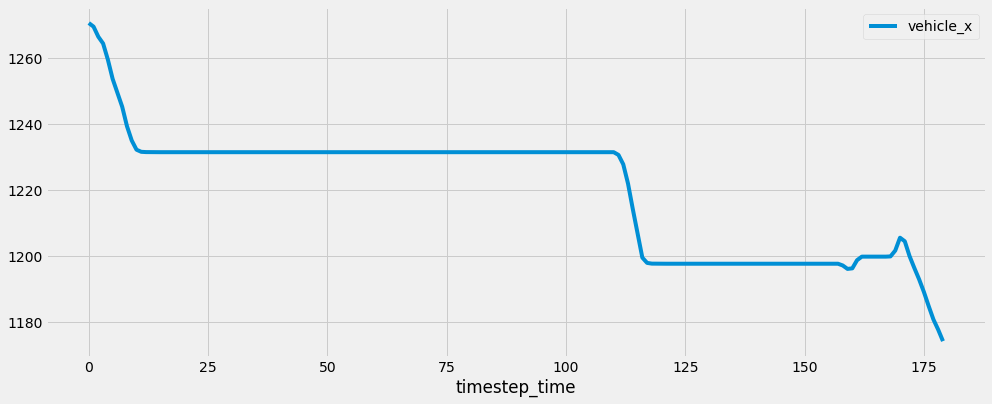

In [ ]:
df1.plot(figsize=(15, 6))
plt.show()

In [ ]:
train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
training_data = train_data['vehicle_x'].values
test_data = test_data['vehicle_x'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))


Testing Mean Squared Error is 0.9501237163349808


In [28]:
print("Root mean square error - RMSE ") 
print(mean_squared_error(test_data, model_predictions, squared=False))

Root mean square error - RMSE 
1.267788886330737


In [ ]:
print("Mean absolute error - MAE")
print(mean_absolute_error(test_data, model_predictions))

Mean absolute error - MAE
0.4832655388031485


In [ ]:
from sklearn.utils.validation import check_consistent_length, check_array

def mean_absolute_percentage_error(y_true, y_pred,
                                   sample_weight=None,
                                   multioutput='uniform_average'):
    """Mean absolute percentage error regression loss.
    Note here that we do not represent the output as a percentage in range
    [0, 100]. Instead, we represent it in range [0, 1/eps]. Read more in the
    :ref:`User Guide <mean_absolute_percentage_error>`.
    .. versionadded:: 0.24
    Parameters
    ----------
    y_true : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples,) or (n_samples, n_outputs)
        Estimated target values.
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    multioutput : {'raw_values', 'uniform_average'} or array-like
        Defines aggregating of multiple output values.
        Array-like value defines weights used to average errors.
        If input is list then the shape must be (n_outputs,).
        'raw_values' :
            Returns a full set of errors in case of multioutput input.
        'uniform_average' :
            Errors of all outputs are averaged with uniform weight.
    Returns
    -------
    loss : float or ndarray of floats in the range [0, 1/eps]
        If multioutput is 'raw_values', then mean absolute percentage error
        is returned for each output separately.
        If multioutput is 'uniform_average' or an ndarray of weights, then the
        weighted average of all output errors is returned.
        MAPE output is non-negative floating point. The best value is 0.0.
        But note the fact that bad predictions can lead to arbitarily large
        MAPE values, especially if some y_true values are very close to zero.
        Note that we return a large value instead of `inf` when y_true is zero.
    Examples
    --------
    >>> from sklearn.metrics import mean_absolute_percentage_error
    >>> y_true = [3, -0.5, 2, 7]
    >>> y_pred = [2.5, 0.0, 2, 8]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.3273...
    >>> y_true = [[0.5, 1], [-1, 1], [7, -6]]
    >>> y_pred = [[0, 2], [-1, 2], [8, -5]]
    >>> mean_absolute_percentage_error(y_true, y_pred)
    0.5515...
    >>> mean_absolute_percentage_error(y_true, y_pred, multioutput=[0.3, 0.7])
    0.6198...
    """
    y_type, y_true, y_pred, multioutput = _check_reg_targets(
        y_true, y_pred, multioutput)
    check_consistent_length(y_true, y_pred, sample_weight)
    epsilon = np.finfo(np.float64).eps
    mape = np.abs(y_pred - y_true) / np.maximum(np.abs(y_true), epsilon)
    output_errors = np.average(mape,
                               weights=sample_weight, axis=0)
    if isinstance(multioutput, str):
        if multioutput == 'raw_values':
            return output_errors
        elif multioutput == 'uniform_average':
            # pass None as weights to np.average: uniform mean
            multioutput = None

    return np.average(output_errors, weights=multioutput)

def _check_reg_targets(y_true, y_pred, multioutput, dtype="numeric"):
    """Check that y_true and y_pred belong to the same regression task.
    Parameters
    ----------
    y_true : array-like
    y_pred : array-like
    multioutput : array-like or string in ['raw_values', uniform_average',
        'variance_weighted'] or None
        None is accepted due to backward compatibility of r2_score().
    Returns
    -------
    type_true : one of {'continuous', continuous-multioutput'}
        The type of the true target data, as output by
        'utils.multiclass.type_of_target'.
    y_true : array-like of shape (n_samples, n_outputs)
        Ground truth (correct) target values.
    y_pred : array-like of shape (n_samples, n_outputs)
        Estimated target values.
    multioutput : array-like of shape (n_outputs) or string in ['raw_values',
        uniform_average', 'variance_weighted'] or None
        Custom output weights if ``multioutput`` is array-like or
        just the corresponding argument if ``multioutput`` is a
        correct keyword.
    dtype : str or list, default="numeric"
        the dtype argument passed to check_array.
    """
    check_consistent_length(y_true, y_pred)
    y_true = check_array(y_true, ensure_2d=False, dtype=dtype)
    y_pred = check_array(y_pred, ensure_2d=False, dtype=dtype)

    if y_true.ndim == 1:
        y_true = y_true.reshape((-1, 1))

    if y_pred.ndim == 1:
        y_pred = y_pred.reshape((-1, 1))

    if y_true.shape[1] != y_pred.shape[1]:
        raise ValueError("y_true and y_pred have different number of output "
                         "({0}!={1})".format(y_true.shape[1], y_pred.shape[1]))

    n_outputs = y_true.shape[1]
    allowed_multioutput_str = ('raw_values', 'uniform_average',
                               'variance_weighted')
    if isinstance(multioutput, str):
        if multioutput not in allowed_multioutput_str:
            raise ValueError("Allowed 'multioutput' string values are {}. "
                             "You provided multioutput={!r}".format(
                                 allowed_multioutput_str,
                                 multioutput))
    elif multioutput is not None:
        multioutput = check_array(multioutput, ensure_2d=False)
        if n_outputs == 1:
            raise ValueError("Custom weights are useful only in "
                             "multi-output cases.")
        elif n_outputs != len(multioutput):
            raise ValueError(("There must be equally many custom weights "
                              "(%d) as outputs (%d).") %
                             (len(multioutput), n_outputs))
    y_type = 'continuous' if n_outputs == 1 else 'continuous-multioutput'

    return y_type, y_true, y_pred, multioutput

In [ ]:
print("MAPE")
print(mean_absolute_percentage_error(test_data, model_predictions))

MAPE
0.0004034490046901311


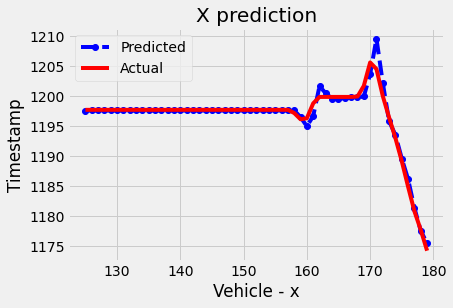

In [ ]:
test_set_range = df1[int(len(df1)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('X prediction')
plt.xlabel('Vehicle - x')
plt.ylabel('Timestamp')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()


# Time Series for y 

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/IIIT-K_Internship/Mobility-prediction/data/vanet-trace-creteil-20130924-0700-0900.csv', sep=';')


In [ ]:
df1=df1[df1['vehicle_id']=='BusFlowNorthSouth0.0']

cols = ['vehicle_slope', 'vehicle_lane', 'vehicle_angle', 'vehicle_type', 'vehicle_pos', 'vehicle_speed','vehicle_id', 'vehicle_x']
df1.drop(cols, axis=1, inplace=True)

df1 = df1.set_index('timestep_time')

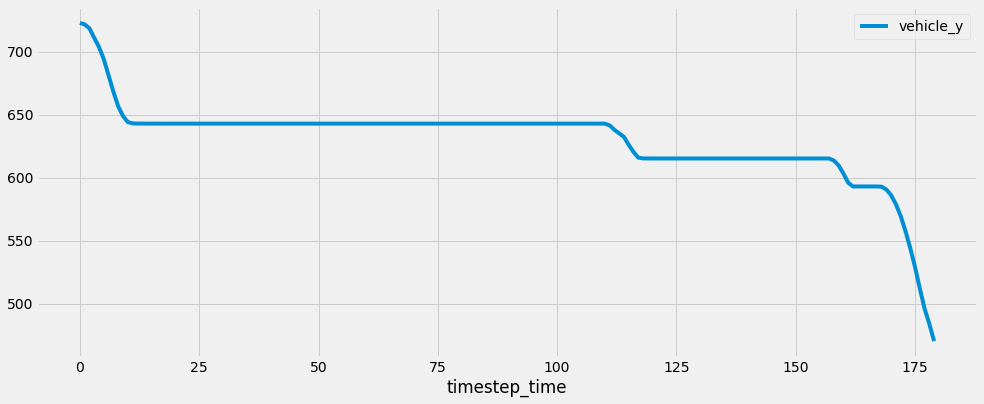

In [ ]:
df1.plot(figsize=(15, 6))
plt.show()

In [ ]:
train_data, test_data = df1[0:int(len(df1)*0.7)], df1[int(len(df1)*0.7):]
training_data = train_data['vehicle_y'].values
test_data = test_data['vehicle_y'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 1.60728866030373


In [ ]:
print("Root mean square error - RMSE ") 
print(mean_squared_error(test_data, model_predictions, squared=False))

Root mean square error - RMSE 
1.267788886330737


In [ ]:
print("Mean absolute error - MAE")
print(mean_absolute_error(test_data, model_predictions))

Mean absolute error - MAE
0.6878423731637099


In [ ]:
print("MAPE")
print(mean_absolute_percentage_error(test_data, model_predictions))

MAPE
0.0012418745484317347


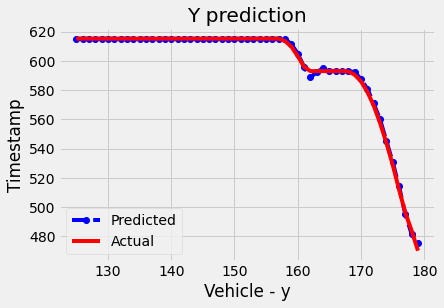

In [ ]:
test_set_range = df1[int(len(df1)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted')
plt.plot(test_set_range, test_data, color='red', label='Actual')
plt.title('Y prediction')
plt.xlabel('Vehicle - y')
plt.ylabel('Timestamp')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()